## Importing the necessary Libraries 

In [88]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
import seaborn as sns
from sklearn.preprocessing import StandardScaler

## read the data 

In [89]:
data = pd.read_csv('diabetes.csv')
data.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
180,6,87,80,0,0,23.2,0.084,32,0
533,6,91,0,0,0,29.8,0.501,31,0
581,6,109,60,27,0,25.0,0.206,27,0
294,0,161,50,0,0,21.9,0.254,65,0
41,7,133,84,0,0,40.2,0.696,37,0


In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [91]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [100]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_bin',
       'Glucose_bin', 'BloodPressure_bin', 'SkinThickness_bin', 'Insulin_bin',
       'BMI_bin', 'DiabetesPedigreeFunction_bin', 'Age_bin'],
      dtype='object')

## Vizualize the Features with outcomes 

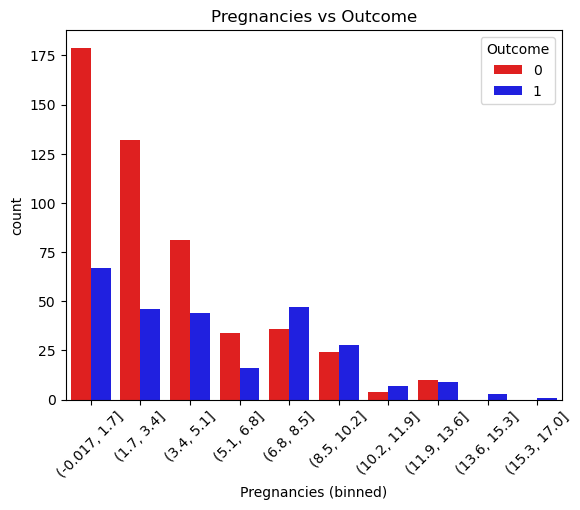

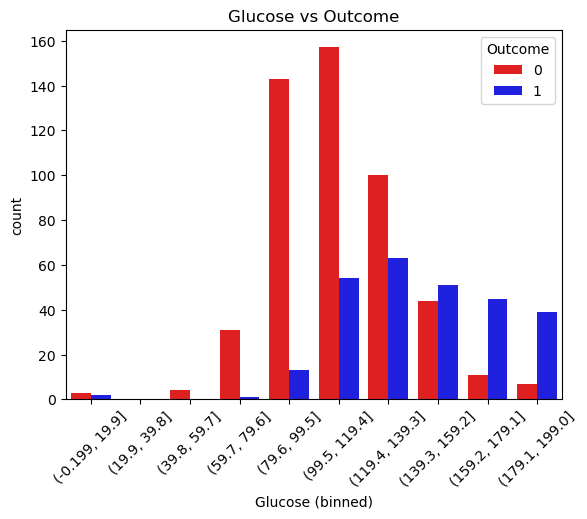

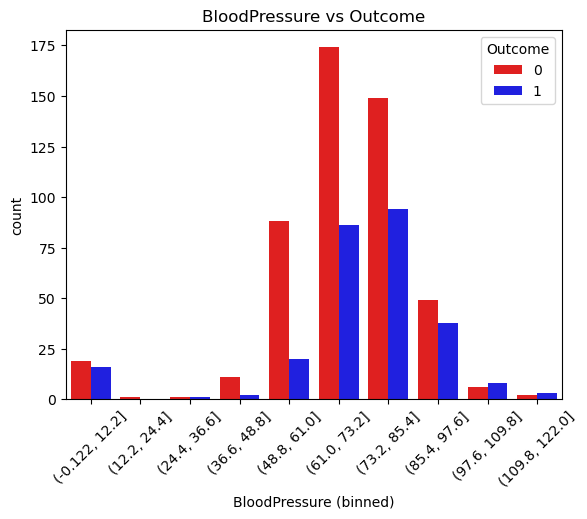

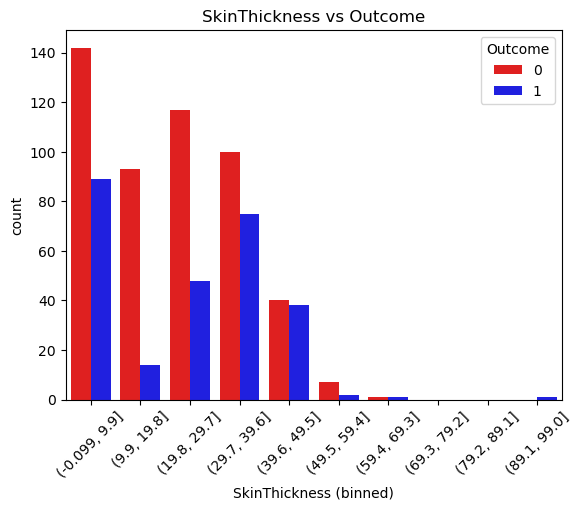

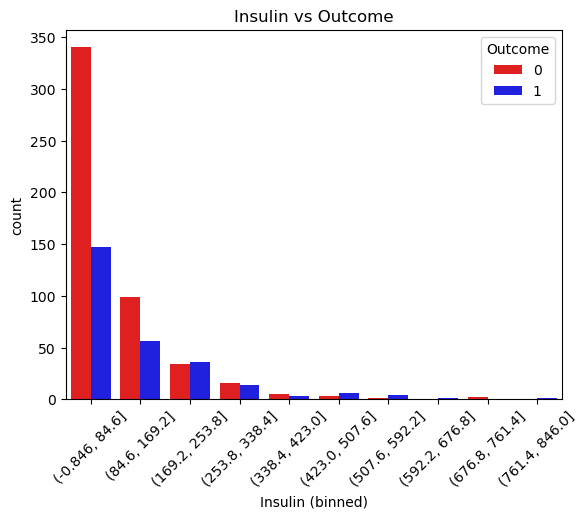

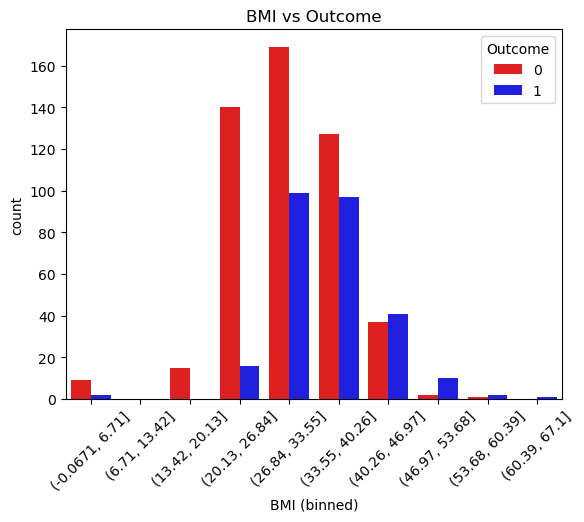

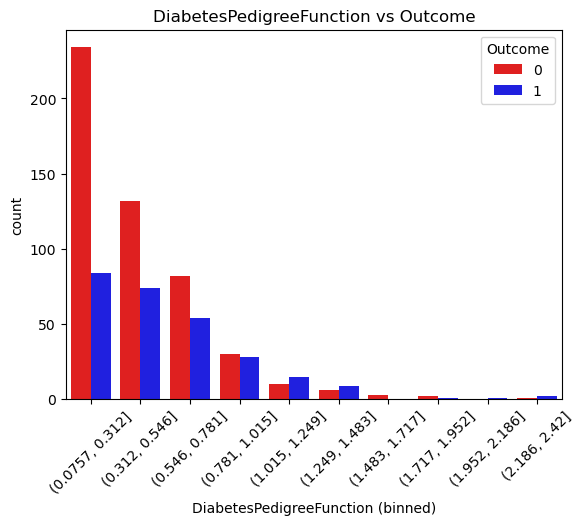

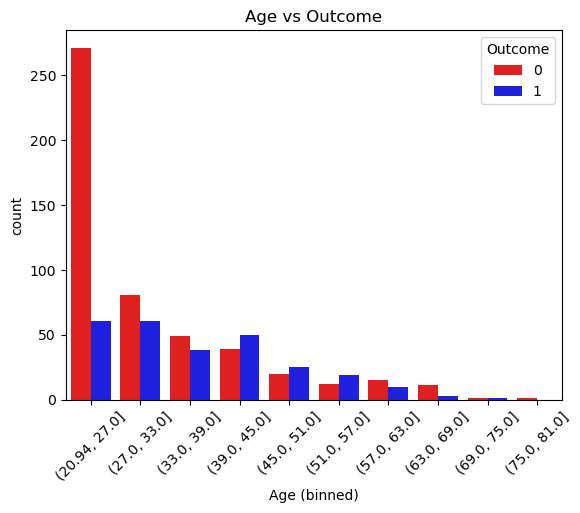

In [93]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
            'BMI', 'DiabetesPedigreeFunction', 'Age']  # exclude 'Outcome'

for col in features:
    data[col + "_bin"] = pd.cut(data[col], bins=10)

for col in features:
    sns.countplot(x=data[col + "_bin"], hue=data["Outcome"], palette=["red", "blue"])
    plt.title(f"{col} vs Outcome")
    plt.xlabel(f"{col} (binned)")
    plt.xticks(rotation=45)
    plt.show()


## train the dataset 

In [94]:
# lets divide the features 

x = data[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
y = data["Outcome"]

x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

## Predict Values & Check Accuracy 

In [97]:
y_pred = knn.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy is : " , accuracy_score(y_test,y_pred))

Accuracy is :  0.7166123778501629
